In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Loan payments data.csv')

In [3]:
# What impact does level of education play on the ability to pay off loans?
# What impact does the age of the loanee play on the ability to pay off loans?
# Is there significance in the cross between education and age with the ability to pay off loans?
# Is there a relation between number of terms and success in paying off loans?
# Which group has the longest past due days?

In [4]:
df.dtypes
df.count()

Loan_ID           500
loan_status       500
Principal         500
terms             500
effective_date    500
due_date          500
paid_off_time     400
past_due_days     200
age               500
education         500
Gender            500
dtype: int64

31.116
6.0847837419560795


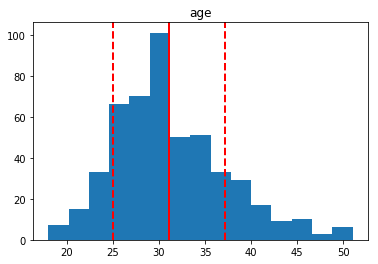

In [17]:
age_mean = np.mean(df['age'])
age_std = np.std(df['age'], ddof=1) 

print(age_mean)
print (age_std)

df.hist(column='age', grid=False, xlabelsize= None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=15,)
plt.axvline(age_mean, color='r', linestyle='solid', linewidth=2)
plt.axvline(age_mean + age_std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(age_mean - age_std, color='r', linestyle='dashed', linewidth=2)



Text(0, 0.5, 'Number of Loans')

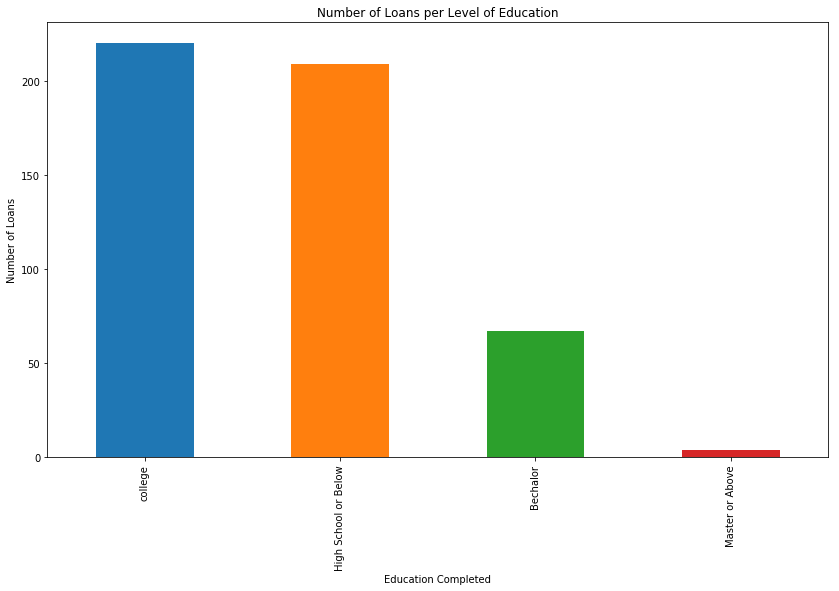

In [6]:
ax = df['education'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Loans per Level of Education")
ax.set_xlabel("Education Completed")
ax.set_ylabel("Number of Loans")

In [7]:
print(df.groupby('education')['Principal'].value_counts())

education             Principal
Bechalor              1000          50
                      800           16
                      500            1
High School or Below  1000         165
                      800           40
                      300            2
                      500            1
                      700            1
Master or Above       300            2
                      800            1
                      1000           1
college               1000         161
                      800           54
                      300            2
                      900            2
                      500            1
Name: Principal, dtype: int64


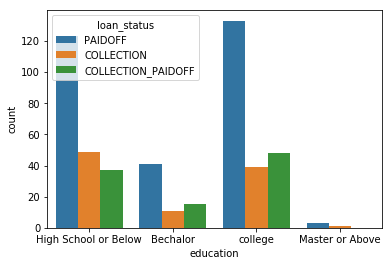

In [8]:
import seaborn as sns

sns.countplot(x='education', data=df, hue='loan_status')



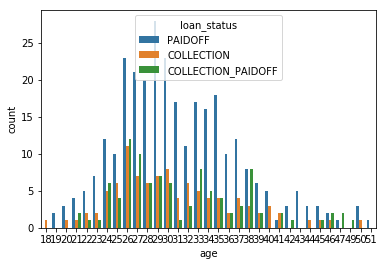

In [9]:
sns.countplot(x='age', data=df, hue='loan_status')

In [10]:
print(df.groupby('education')['age'].count())

education
Bechalor                 67
High School or Below    209
Master or Above           4
college                 220
Name: age, dtype: int64


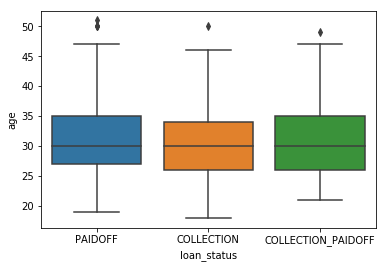

In [11]:
sns.boxplot(x='loan_status', y='age', data=df)

Text(0, 0.5, 'Number of Loans')

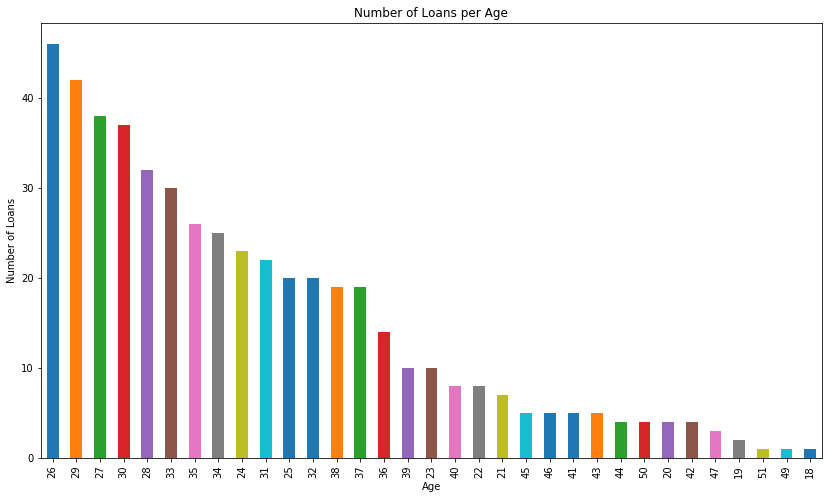

In [12]:
ax = df['age'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Loans per Age")
ax.set_xlabel("Age")
ax.set_ylabel("Number of Loans")

In [19]:
df[['loan_status', 'Principal', 'Loan_ID']].groupby(['loan_status', 'Principal']).agg(['count'])

Loan_ID
                               count
loan_status        Principal        
COLLECTION         800            23
                   1000           77
COLLECTION_PAIDOFF 500             1
                   800            19
                   1000           80
PAIDOFF            300             6
                   500             2
                   700             1
                   800            69
                   900             2
                   1000          220